# Predicting heart disease with machin learning
This notebook looks into using various python-based machine learning and data science libraries in an attempt to build a machin learning model capable of predictiong whether or not someone hase heart disease based on their medical attributes

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook

%matplotlib inline 

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model evaluation

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay



In [2]:
df=pd.read_csv("heart-disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df["sex"].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [4]:
pd.crosstab(df["target"],df["sex"])

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

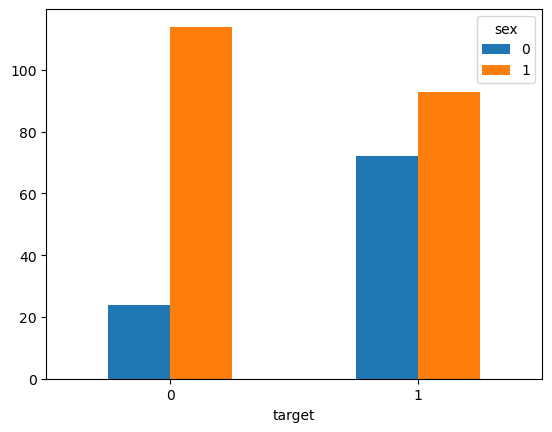

In [5]:
pd.crosstab(df["target"],df["sex"]).plot(kind="bar")
plt.xticks(rotation=0)

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df["thalach"].value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

# Age vs Max heart Rate for heart disease

C:\Users\ChiaLeilypour\AppData\Local\Temp\ipykernel_14764\255434031.py:11: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend("Dieseas","No Disease")


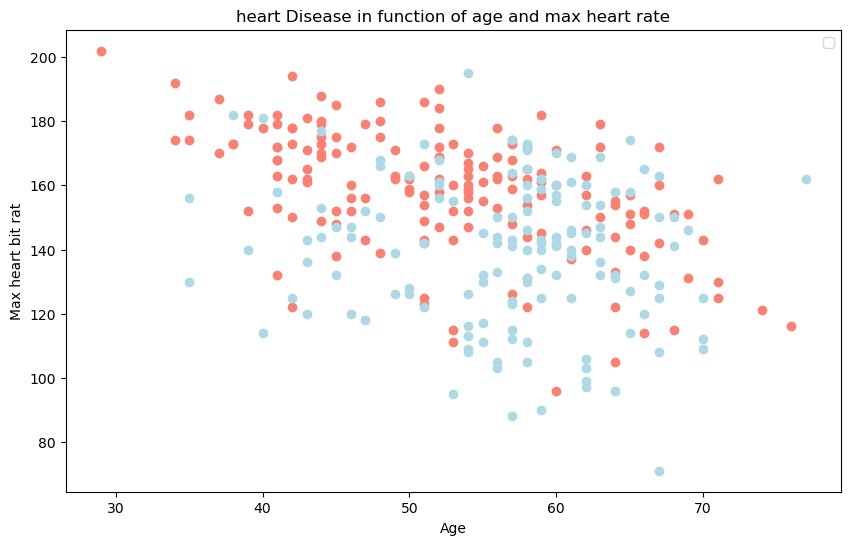

In [8]:
plt.figure(figsize=(10,6))

#scattert with positive examples
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],c="salmon")
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],c="lightblue")

# add some helpful info
plt.title("heart Disease in function of age and max heart rate")
plt.xlabel("Age")
plt.ylabel("Max heart bit rat")
plt.legend("Dieseas","No Disease")

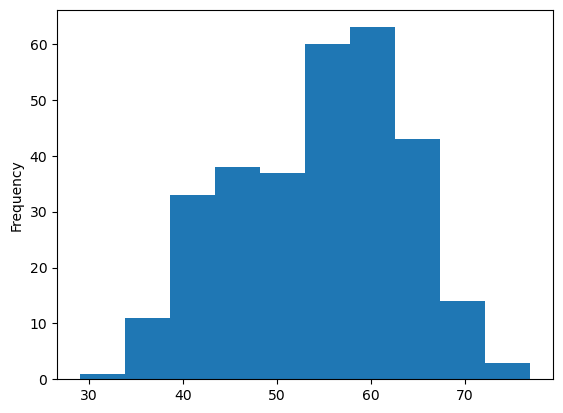

In [9]:
df.age.plot.hist();

### Heart disease frequency per chest pain type

In [10]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


<Axes: xlabel='cp'>

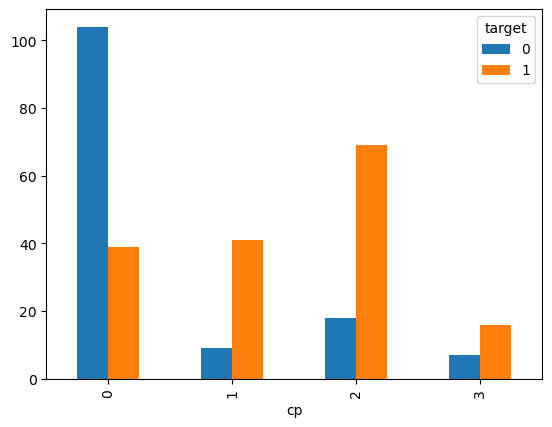

In [11]:
pd.crosstab(df.cp,df.target).plot(kind="bar")

## Building coleration matrix

In [12]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


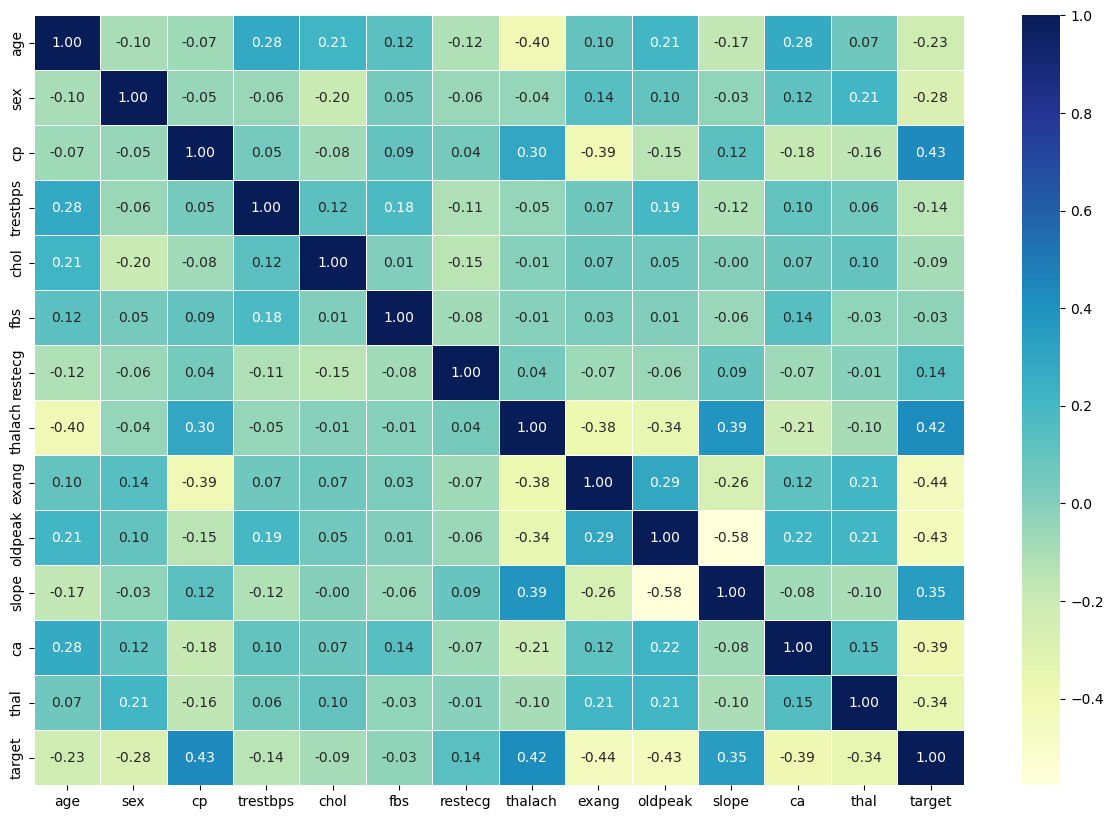

In [13]:
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt=".2f",cmap="YlGnBu")

In [14]:
x=df.drop("target",axis=1)
y=df.target

In [15]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [16]:
np.random.seed(42)
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [17]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [18]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

In [19]:
 #put models in dictionary

models={"Logistic Regression": LogisticRegression(),
        "KNN":KNeighborsClassifier(),
         "Random Forest":RandomForestClassifier()}


def fit_and_score(models,x_train,x_test,y_train,y_test):
    np.random.seed(42)
    model_score={}
    for name, models in models.items():
        models.fit(x_train,y_train)
        model_score[name]=models.score(x_test,y_test)
    return model_score

In [20]:
model_score=fit_and_score(models=models,
                          x_train=x_train,
                          x_test=x_test,
                          y_train=y_train,
                          y_test=y_test)
model_score

c:\Users\ChiaLeilypour\Desktop\AI_TEST_PROJECT\env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Model comparision

<Axes: >

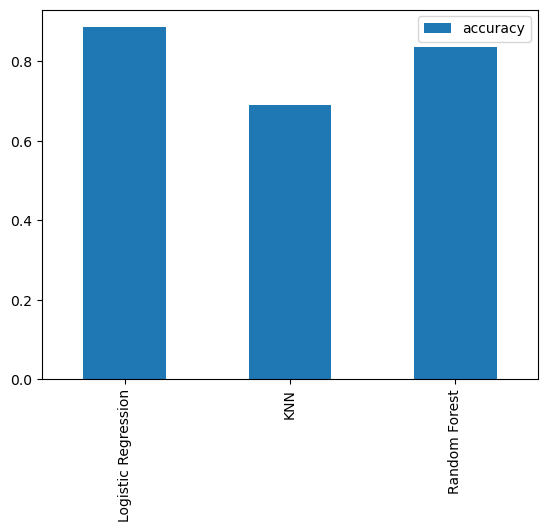

In [21]:
model_compare=pd.DataFrame(model_score,index=["accuracy"])
model_compare.T.plot.bar()

In [22]:
model_compare

,Logistic Regression,KNN,Random Forest
accuracy,0.885246,0.688525,0.836066


In [23]:
# lets tune KNN
train_scores=[]
test_scores=[]

# Create a list of different values  for n_nighbor
nighbors=range(1,21)

knn=KNeighborsClassifier()


for i in nighbors:
    knn.set_params(n_neighbors=i)
    #fit the algorithm
    knn.fit(x_train,y_train)

    # Update the training scores list
    train_scores.append(knn.score(x_train,y_train))
    test_scores.append(knn.score(x_test,y_test))
    

In [24]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [25]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

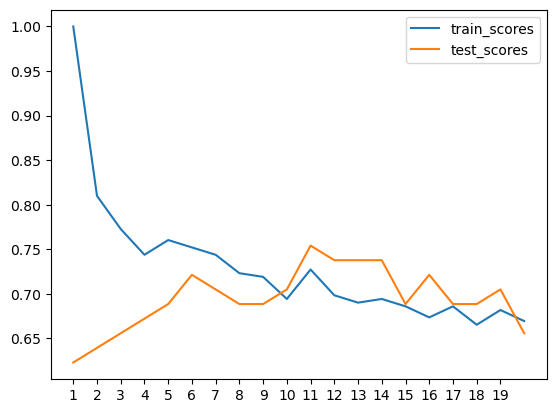

In [26]:
plt.plot(nighbors,train_scores,label="train_scores")
plt.plot(nighbors,test_scores, label="test_scores")
plt.xticks(np.arange(1,20,1))
plt.legend()



## Hyperparameter tuning with RandomizedSearchCV

* Logistic regression()
* Random forest classifier
* ... using RandomizedSearchCV

#

In [27]:
# Create a Hyperparameter grid for LogisticRegression

log_reg_grid={"C": np.logspace(-4,4,20),
              "solver":["liblinear"]}

#Create a hyperparameter grid for RandomForestClassifier
rf_grid={"n_estimators": np.arange(10,1000,5),
         "max_depth":[None,3,5,10],
         "min_samples_split":np.arange(2, 20, 2),
         "min_samples_leaf":np.arange(1,20,2)}

In [28]:
 # tune Logestic regression
np.random.seed()

# setup random hyperparameter search for LogisticRegression
rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                              param_distributions=log_reg_grid,
                              cv=5,
                              n_iter=20,
                              verbose=True)
# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [29]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [30]:
rs_log_reg.score(x_test,y_test)

0.8852459016393442

## Now we have tuned LogesticRegression, lets do it for RandomForestClassifierm

In [31]:
# Setup random seed
np.random.seed(42)
##setup random hyperparameter search for RandomForestClassifier

rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                         param_distributions=rf_grid,
                         cv=5,
                         n_iter=20,
                         verbose=True)
## rs_rf= Random Search Random Forest
rs_rf.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,  70,
        75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125, 130, 135,
       140, 145, 150, 155, 160, 1...
       530, 535, 540, 545, 550, 555, 560, 565, 570, 575, 580, 585, 590,
       595, 600, 605, 610, 615, 620, 625, 630, 635, 640, 645, 650, 655,
       660, 665, 670, 675, 680, 685, 690, 695, 700, 705, 710, 715, 720,
       725, 730, 735, 740, 745, 750, 755, 760, 765, 770, 775, 780, 785,
       790, 795, 800, 805, 810, 815, 820, 825, 830, 835, 840, 845, 850,
       855, 860, 865, 870, 875, 880, 885, 890, 895, 900, 905, 910, 915,
       920, 925, 930, 935, 940, 945, 950, 955, 960, 965, 970, 975, 980,
       985, 990, 995])},
                   verbose=True)

In [32]:
# find the best hyperparameterrs
rs_rf.best_params_

{'n_estimators': 775,
 'min_samples_split': 16,
 'min_samples_leaf': 17,
 'max_depth': None}

In [33]:
## evaluate the randomized search RandomForestClassifier Model
rs_rf.score(x_test,y_test) 

0.8688524590163934

In [35]:
# Hyperparameter Tuning with GridSearchCV
# Recreat different hyperparameter for our Logisticregression model

log_reg_grid={"C": np.logspace(-4,4,30),
              "solver":["liblinear"]}

# setup grid hyperparameter search for logisticregression

gs_log_reg=GridSearchCV(LogisticRegression(),
                        param_grid=log_reg_grid,
                        cv=5,
                        verbose=True)
gs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [36]:
# check the best hyperparameter
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [37]:
#evaluate the grid search LogisticRegression model
gs_log_reg.score(x_test,y_test)

0.8852459016393442

## Evaluation our tuned machine learning classifier beyand accuracy
* ROC curve and AUC score
* Confusion matrix
* classification report
* Precision
* Recall
* F1-score

and it would be great if cross-validation was used where possible

to make comparisons and evaluate our trained mode, First we need to make predictions.

In [38]:
# Make predictions with tuned model
y_preds=gs_log_reg.predict(x_test)

In [39]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [40]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

In [62]:
# ROC curve
# Plot ROC curve and calculate AUC metric

RocCurveDisplay(gs_log_reg,x_test,y_test)


TypeError: RocCurveDisplay.__init__() takes 1 positional argument but 4 were given

In [57]:
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


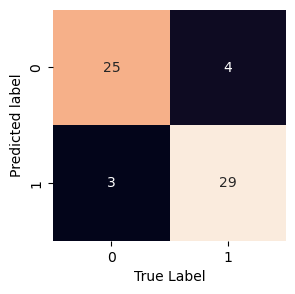

In [61]:
def plot_conf_mat(y_test,y_preds):
    """
    Plots a nice looking confusion matrix using seaborn heatmap()
    """

    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),
                   annot=True,
                   cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted label")

plot_conf_mat(y_test,y_preds)

In [65]:
print (classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [66]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [68]:
# Create a new classifier with best parameters
clf=LogisticRegression(C=0.20433597178569418,solver="liblinear")


In [83]:
# Cross- validated accuracy
cv_accuracy=cross_val_score(clf,x,y,cv=5,scoring="accuracy")
cv_accuracy=np.mean(cv_accuracy)
cv_accuracy

0.8446994535519124

In [84]:
# Cross- validated precission
cv_precision=cross_val_score(clf,x,y,cv=5,scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.8207936507936507

In [85]:
# Cross- validated recall
cv_recall=cross_val_score(clf,x,y,cv=5,scoring="recall")
cv_recall=np.mean(cv_recall)
cv_recall

0.9212121212121213

In [86]:
# Cross- validated f1-score
cv_f1=cross_val_score(clf,x,y,cv=5,scoring="f1")
cv_f1=np.mean(cv_f1)
cv_f1

0.8673007976269721

<Axes: title={'center': 'Cross-validated classification metrix'}>

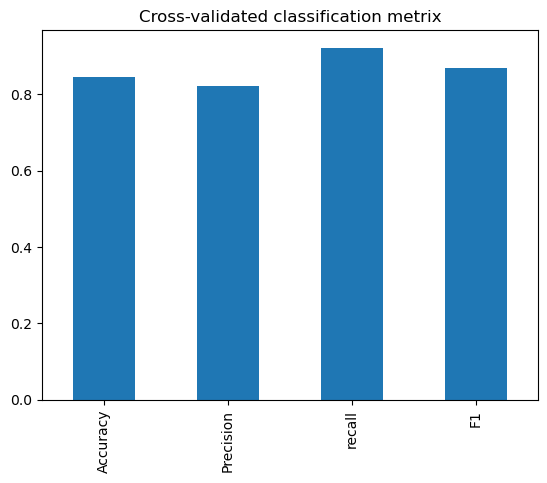

In [91]:
# Visualize our cross-validated metrix
cv_metrics=pd.DataFrame({"Accuracy":cv_accuracy, "Precision": cv_precision, "recall": cv_recall, "F1":cv_f1 }, index=[0]) 
cv_metrics.T.plot.bar(title="Cross-validated classification metrix", legend=False)
